**Procesamiento de datos con _python_**
-
---

In [3]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [7]:
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:,None,2]
# raw.sample(2)

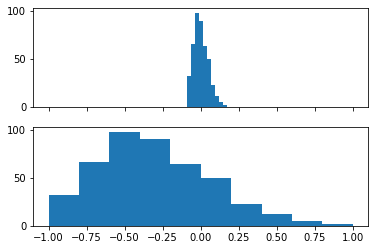

In [29]:
# reglas de escalamiento
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw-min_raw)/(max_raw-min_raw)
fig, axs = plt.subplots(2, 1, sharex=True)
# print(axs)
axs[0].hist(raw)
axs[1].hist(scaled)
plt.show()

In [38]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [46]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number=100)
print('train raw:\t{}'.format(raw_time))
print('train scaled:\t{}'.format(scaled_time))

train raw:	0.03844960000060382
train scaled:	0.03514489999724901
